In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics


In [45]:
df=pd.read_csv('/content/medical-charges.csv')

In [46]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [47]:
df.shape

(1338, 7)

In [48]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [49]:
df.describe()


,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


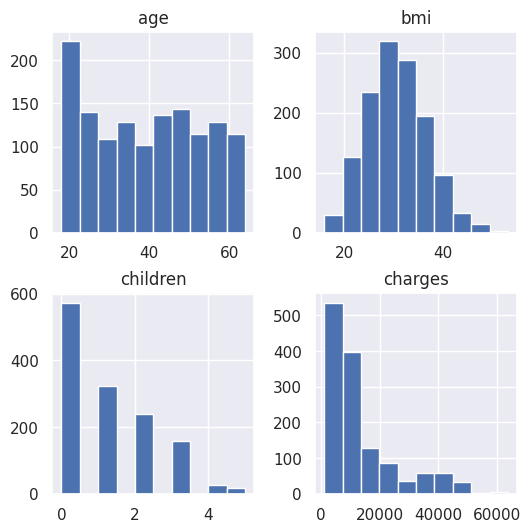

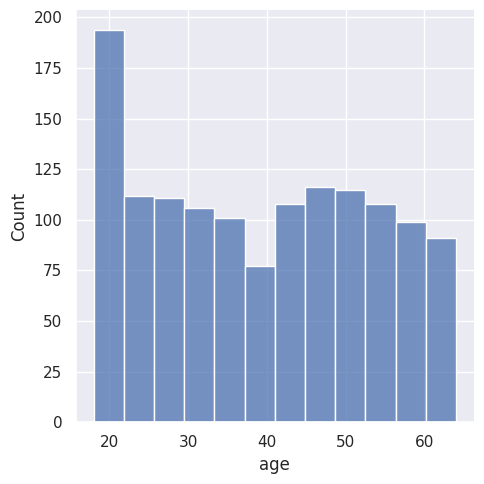

In [50]:
#data distribution for all columns
sns.set()
df.hist(figsize=(6,6))
sns.displot(df['age'])

,count
sex,
male,676
female,662


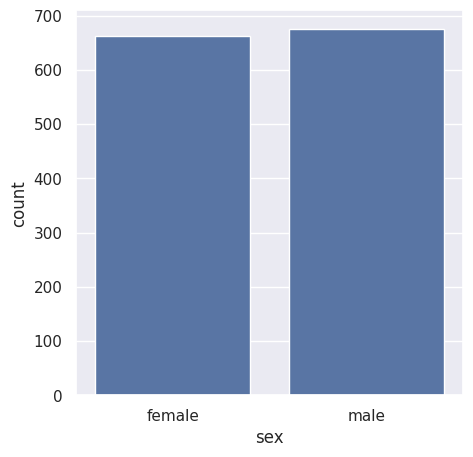

In [51]:
#data distribution for categorical val
plt.figure(figsize=(5,5))
sns.countplot(x='sex',data=df)
df['sex'].value_counts()

,count
smoker,
no,1064
yes,274


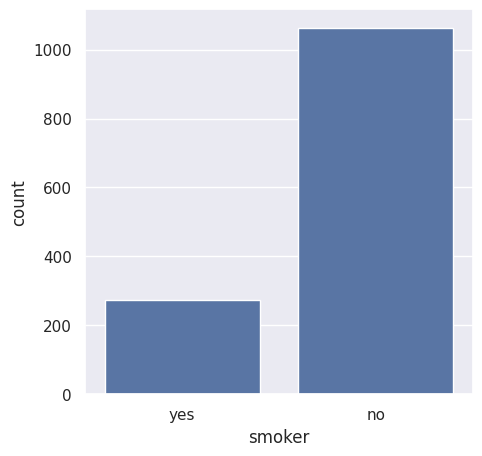

In [52]:
plt.figure(figsize=(5,5))
sns.countplot(x='smoker',data=df)
df['smoker'].value_counts()


In [53]:
df['region'].value_counts()

,count
region,
southeast,364
southwest,325
northwest,325
northeast,324


In [54]:
#replacing or encoding the categorical data
df.replace({'sex':{'male':0,'female':1}},inplace=True)

df.replace({'smoker':{'yes':0,'no':1}},inplace=True)

df.replace({'region':{'southeast':0,'southwest':1,'northeast':2,'northwest':3}},inplace=True)



/tmp/ipython-input-3022091045.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'sex':{'male':0,'female':1}},inplace=True)
/tmp/ipython-input-3022091045.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'smoker':{'yes':0,'no':1}},inplace=True)
/tmp/ipython-input-3022091045.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.se

In [55]:
df.head()


,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,0,1,16884.92400
1,18,0,33.770,1,1,0,1725.55230
2,28,0,33.000,3,1,0,4449.46200
3,33,0,22.705,0,1,3,21984.47061
4,32,0,28.880,0,1,3,3866.85520


In [56]:
X=df.drop(['charges'],axis=1)
Y=df['charges']

In [57]:
print(X)
print(Y)

      age  sex     bmi  children  smoker  region
0      19    1  27.900         0       0       1
1      18    0  33.770         1       1       0
2      28    0  33.000         3       1       0
3      33    0  22.705         0       1       3
4      32    0  28.880         0       1       3
...   ...  ...     ...       ...     ...     ...
1333   50    0  30.970         3       1       3
1334   18    1  31.920         0       1       2
1335   18    1  36.850         0       1       0
1336   21    1  25.800         0       1       1
1337   61    1  29.070         0       0       3

[1338 rows x 6 columns]
0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64


In [80]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=554)

In [81]:
X_train.shape


(1070, 6)

In [82]:

Y_test.shape

(268,)

getting best r2 score in linear regression

In [83]:
regressor=LinearRegression()
regressor.fit(X_train,Y_train)

LinearRegression()

In [84]:
training_data_prediction=regressor.predict(X_train)



In [87]:
print("r2 train val:",metrics.r2_score(Y_train,training_data_prediction))

r2 train val: 0.7516516626912264


In [88]:
#predict the xtest
testing_data_prediction=regressor.predict(X_test)
print("r2 test val:",metrics.r2_score(Y_test,testing_data_prediction))

r2 test val: 0.7419914152417192


In [89]:
import pickle

# Save the trained model as a pickle file
filename = 'medical_insuarance_cost _predecition_model.pkl'
pickle.dump(regressor, open(filename, 'wb'))

print(f"Model successfully saved as {filename}")

Model successfully saved as medical_insuarance_cost _predecition_model.pkl
